# Demo creating a multi-component smart building
Single agent composed of building thermal dynamics + PV + battery gym environments.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gridworld import MultiComponentEnv
from gridworld.agents.buildings import FiveZoneROMThermalEnergyEnv
from gridworld.agents.pv import PVEnv
from gridworld.agents.energy_storage import EnergyStorageEnv

%matplotlib inline

# Env configuration

In [3]:
# Create a list of the agent's components.  Notice that each component dict
# has a name, cls (constructor), and configuration dict.  We'll set 
# rescale_spaces = False here to see the raw trajectories; generally, will want
# to set to True for RL training.

building = {
    "name": "building",
    "cls": FiveZoneROMThermalEnergyEnv,
    "config": {
        "start_time": "08-12-2020 00:00:00",
        "end_time": "08-13-2020 00:00:00",
        "rescale_spaces": False,
        "obs_config": {
            "zone_temp": (18, 34),
            "p_consumed": (-100, 100)
        }
    }
}

pv = {
    "name": "pv",
    "cls": PVEnv,
    "config": {
        "profile_csv": "pv_profile.csv",
        "scaling_factor": 10.,
        "rescale_spaces": False
    }
}

storage = {
    "name": "storage",
    "cls": EnergyStorageEnv,
    "config": {"rescale_spaces": False}
}

# Once the individual components are defined, we create a components list that
# the multi-component agent will use to construct them internally.
components = [building, pv, storage]

# Create the env
env = MultiComponentEnv(name="smart-building", components=components)

In [4]:
env.action_space.items()

ItemsView(Dict('building': Box([ 0.22  0.22  0.22  0.22  0.32 10.  ], [ 2.2  2.2  2.2  2.2  3.2 16. ], (6,), float64), 'pv': Box(0.0, 1.0, (1,), float64), 'storage': Box(-1.0, 1.0, (1,), float64)))

# Run the env with a "min" policy
Pretty meaningless policy but generates some data for us.

In [5]:
env.reset()
done = False
states = []
while not done:
    action = {name: space.low for name, space in env.action_space.items()}
    obs, rew, done, meta = env.step(action)
    states.append(obs)

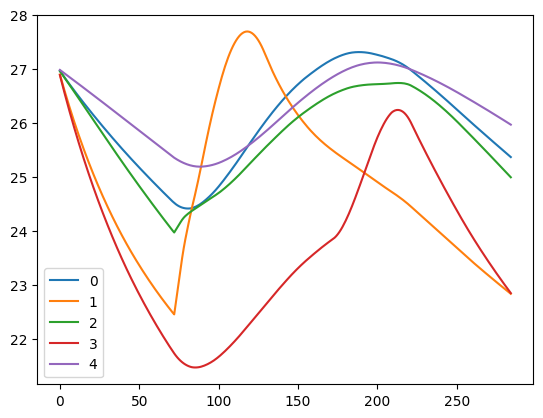

In [6]:
# Plot the zone temperatures
bldg_data = [s["building"][:5] for s in states]
_ = pd.DataFrame(bldg_data).plot()

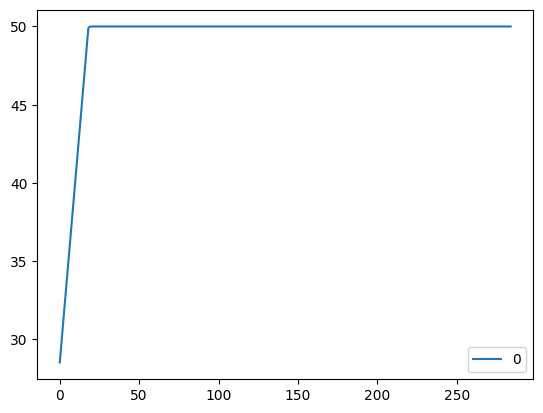

In [7]:
# Plot the energy stored -- min policy means always charging.
storage_data = [s["storage"][0] for s in states]
_ = pd.DataFrame(storage_data).plot()

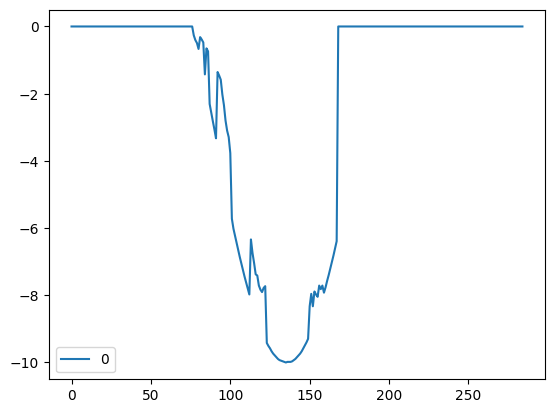

In [8]:
# Plot the PV injection -- min policy means curtail 0% (inject all
# available real power).
pv_data = [s["pv"][0] for s in states]
_ = pd.DataFrame(pv_data).plot()